In [1]:
import pandas as pd

In [22]:
eng_tweets = pd.read_csv("english_tweets123 copy.csv")
#hi = pd.read_csv("final_stopwords.txt")
hieng = pd.read_csv("hinglish_stopwords.txt")
eng_tweets.head()

,created_at,screen_name,text,hashtags,source,description,lang,CAA_stance,news_notnews
0,2/24/20,Rohan_VP,Pro and Anti CAA protesters should be ashamed ...,CAA_NRC_Protests Ratanlal,Twitter for Android,"Proud Indian, Mumbaikar and Lifetime supporter...",en,Neutral,Not News
1,2/24/20,AejazJnu,The time of the hour is to maintain calm and p...,CAA_NRCmovement DelhiPolice,Twitter for Android,Former General Secretary Jawaharlal Nehru Univ...,en,Anti_CAA,Not News
2,2/24/20,Dhawan_Gupta,Watch Pistol Wielding AntiCAA Protester Opens ...,NaN,Twitter Web App,i'm the best!!!!!!!!!!!!!!!,en,Pro_CAA,Not News
3,2/22/20,MilanViradia02,gupta you think that CAA is applicable for e...,NaN,Twitter for Android,The Past Can't be changed. The Future is yet i...,en,Pro_CAA,Not News
4,2/24/20,VMVMVM999,Lekhi Tragic loss amp completely avoidable Str...,NaN,Twitter for iPhone,NaN,en,Pro_CAA,Not News


In [23]:
eng_tweets.shape

(102816, 9)

In [24]:
#drop first two columns
#eng_tweets = eng_tweets.drop(["Unnamed: 0"], axis = 1)

In [25]:
eng_tweets.shape
eng_tweets.CAA_stance.value_counts()

Pro_CAA     10027
Anti_CAA     7390
Neutral      2694
Name: CAA_stance, dtype: int64

In [26]:
eng_tweet = eng_tweets[eng_tweets["CAA_stance"].notnull()]

In [8]:
eng_tweet.shape

(20111, 9)

In [9]:
eng_tweet.head()

,created_at,screen_name,text,hashtags,source,description,lang,CAA_stance,news_notnews
0,2/24/20,Rohan_VP,Pro and Anti CAA protesters should be ashamed ...,CAA_NRC_Protests Ratanlal,Twitter for Android,"Proud Indian, Mumbaikar and Lifetime supporter...",en,Neutral,Not News
1,2/24/20,AejazJnu,The time of the hour is to maintain calm and p...,CAA_NRCmovement DelhiPolice,Twitter for Android,Former General Secretary Jawaharlal Nehru Univ...,en,Anti_CAA,Not News
2,2/24/20,Dhawan_Gupta,Watch Pistol Wielding AntiCAA Protester Opens ...,NaN,Twitter Web App,i'm the best!!!!!!!!!!!!!!!,en,Pro_CAA,Not News
3,2/22/20,MilanViradia02,gupta you think that CAA is applicable for e...,NaN,Twitter for Android,The Past Can't be changed. The Future is yet i...,en,Pro_CAA,Not News
4,2/24/20,VMVMVM999,Lekhi Tragic loss amp completely avoidable Str...,NaN,Twitter for iPhone,NaN,en,Pro_CAA,Not News


In [10]:
from io import StringIO
col = ['CAA_stance', 'text']
eng_tweet = eng_tweet[col]
eng_tweet = eng_tweet[pd.notnull(eng_tweet['text'])]
eng_tweet.columns = ['CAA_stance', 'text']
eng_tweet['stance_id'] = eng_tweet['CAA_stance'].factorize()[0]
stance_id_df = eng_tweet[['CAA_stance', 'stance_id']].drop_duplicates().sort_values('stance_id')
stance_to_id = dict(stance_id_df.values)
id_to_stance = dict(stance_id_df[['stance_id', 'CAA_stance']].values)
eng_tweet.head(10)

,CAA_stance,text,stance_id
0,Neutral,Pro and Anti CAA protesters should be ashamed ...,0
1,Anti_CAA,The time of the hour is to maintain calm and p...,1
2,Pro_CAA,Watch Pistol Wielding AntiCAA Protester Opens ...,2
3,Pro_CAA,gupta you think that CAA is applicable for e...,2
4,Pro_CAA,Lekhi Tragic loss amp completely avoidable Str...,2
5,Anti_CAA,Listen barkha\nHC RatanLal was killed by an an...,1
6,Neutral,Dear please stand with those who needs you...,0
7,Pro_CAA,But will you question the media houses such as...,2
8,Pro_CAA,Tiwari He has been arrested and was from anti...,2
9,Pro_CAA,He was from anti caa protest,2


In [11]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreyaagarwal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
final_stopwords_list = stopwords.words('english') 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf = True, min_df = 5, norm ='l2', encoding='utf8', ngram_range=(1, 2), stop_words = final_stopwords_list)
features = tfidf.fit_transform(eng_tweet.text).toarray()
labels = eng_tweet.stance_id
features.shape

(20111, 12402)

In [14]:
from sklearn.feature_selection import chi2
import numpy as np
N = 10
for CAA_stance, stance_id in sorted(stance_to_id.items()):
  features_chi2 = chi2(features, labels == stance_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(CAA_stance))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Anti_CAA':
  . Most correlated unigrams:
. npr
. india
. human
. mosque
. sanghis
. rights
. hindus
. sanghi
. reject
. fascist
  . Most correlated bigrams:
. caa communal
. president smt
. democracy caa
. anti democracy
. internal matter
. communal caa
. people india
. anti national
. human rights
. reject caa
# 'Neutral':
  . Most correlated unigrams:
. delhis
. maujpur
. northeastdelhi
. delhihc
. toll
. updates
. clashes
. live
. northeast
. anticaa
  . Most correlated bigrams:
. follow live
. death toll
. delhi violence
. delhicaaclashes live
. live updates
. anticaa protests
. pro anticaa
. anticaa protest
. northeast delhi
. anticaa protesters
# 'Pro_CAA':
  . Most correlated unigrams:
. hindu
. jihad
. tahirhussain
. jihadi
. reject
. jihadis
. anticaa
. stopkillinghindus
. fascist
. hindus
  . Most correlated bigrams:
. northeast delhi
. anticaa protesters
. aapक आत
. home minister
. anti caa
. tahir hussain
. anti nationals
. reject caa
. human rights
. anti national


In [15]:
#Model building

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreyaagarwal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize    

X_train, X_test, y_train, y_test = train_test_split(eng_tweet['text'], eng_tweet['CAA_stance'], random_state = 0)

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]
    
count_vect = CountVectorizer(tokenizer = LemmaTokenizer())

X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

models = [
    LinearSVC(multi_class = 'ovr', class_weight='balanced'),
    LogisticRegression(random_state = 0, max_iter = 7600),
    MultinomialNB(),
    SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                       max_iter = 5, tol = None),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring = 'accuracy', cv = CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])



In [19]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.785542
LogisticRegression    0.778083
MultinomialNB         0.754466
SGDClassifier         0.720156
Name: accuracy, dtype: float64

In [27]:
keys = list(eng_tweet.columns.values)
i1 = eng_tweets.set_index(keys).index
i2 = eng_tweet.set_index(keys).index
tobelabelled = eng_tweets[~i1.isin(i2)]

In [30]:
tobelabelled.shape

(82705, 9)

In [42]:
s_1 = tobelabelled[1:20000]

In [44]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]
    
count_vect = CountVectorizer(tokenizer = LemmaTokenizer())

Z_train_counts = count_vect.fit_transform(s_1["text"])

tfidf_transformer = TfidfTransformer()

Z_train_tfidf = tfidf_transformer.fit_transform(Z_train_counts)

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, eng_tweet.index, test_size=0.33, random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [45]:
Z_pred = model.predict(Z_train_counts)

ValueError: X has 26186 features per sample; expecting 12402

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=stance_id_df.CAA_stance.values, yticklabels=stance_id_df.CAA_stance.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [149]:
#Check for mis representations in the model

In [130]:
from IPython.display import display
for predicted in stance_id_df.stance_id:
  for actual in stance_id_df.stance_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_stance[actual], id_to_stance[predicted], conf_mat[actual, predicted]))
      display(eng_tweet.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['CAA_stance', 'text']])
      print('')

'Anti_CAA' predicted as 'Neutral' : 39 examples.


,CAA_stance,text
20146,Anti_CAA,\nDelhi Riots Mosque Set on Fire in Ashok Nag...
87067,Anti_CAA,When was CAA proposed to the
92233,Anti_CAA,Journalist Shaheen detained in UP while report...
51638,Anti_CAA,Delhi Police hold flag march in Delhis Chand B...
88052,Anti_CAA,\nshare your views on it\n
57604,Anti_CAA,Why did it take so long for AmitShah or Ajit D...
92028,Anti_CAA,CAANPRµæã \nCAANRCProtests \n \nantiCAA campai...
87284,Anti_CAA,Karnatakas Shaheen School sedition case Bail g...
19503,Anti_CAA,Cant let another 1984 take place says court wh...
34431,Anti_CAA,Watch this\n\n



'Pro_CAA' predicted as 'Neutral' : 26 examples.


,CAA_stance,text
50953,Pro_CAA,\nAnd Delhi Police
36643,Pro_CAA,Chandrashekharravan also one of the main accu...
97919,Pro_CAA,Finance Minister said that citizens should be...
11003,Pro_CAA,Doval in North East district of Delhi to take ...
47261,Pro_CAA,Delhi Police Sources now clarify that Shahrukh...
38898,Pro_CAA,Shaheen Bagh agitation itself being adjudicat...
95194,Pro_CAA,Whoever believes in the ideology of GhazwaeHin...
35997,Pro_CAA,Latest and updated and very trained female ji...
48238,Pro_CAA,\n \nPeacful Protestors of antiCAA
51786,Pro_CAA,Someone Please remind that Former PM Indira G...



'Neutral' predicted as 'Anti_CAA' : 89 examples.


,CAA_stance,text
101126,Neutral,There is no problem in controlling the riots w...
99980,Neutral,Indian startup Innefu is providing facial reco...
102281,Neutral,ICYMI Pink Floyds Roger Waters recites Aamir A...
100446,Neutral,US Religious Freedom Commission says CAA may l...
100868,Neutral,Justice Kaul makes an appeal for peace\n\nAll ...
...,...,...
101084,Neutral,Justice Muralidhar points out when KapilMishra...
102447,Neutral,The Bench of Chief Justice Dhirubhai N Patel a...
100830,Neutral,Delhi No Mosque Vandalised in Ashok Vihar Say ...
102287,Neutral,HRC Moves Supreme Court Over CAA India Hits Ba...



'Pro_CAA' predicted as 'Anti_CAA' : 323 examples.


,CAA_stance,text
39455,Pro_CAA,Save India from s
23815,Pro_CAA,Thanks to BalaSaheb Thackeray that Mumbai nevr...
48525,Pro_CAA,in pakistani we punjabi muslims fear if we don...
26951,Pro_CAA,She was pelting stones on police\nFell down in...
52716,Pro_CAA,Right definition of Secularism\n from\n
...,...,...
50214,Pro_CAA,Sooooo disappointed news Stocking\ndelhi modit...
39024,Pro_CAA,Urgently
48274,Pro_CAA,Goons like Kapil Mishra caused this riots
45852,Pro_CAA,RadicalIslamicTerrorism the way people in the ...



'Neutral' predicted as 'Pro_CAA' : 50 examples.


,CAA_stance,text
100970,Neutral,Delhi violence affects fruits vegetables whole...
102768,Neutral,The CitizenshipAmendmentBill2019 rests on shak...
101504,Neutral,The DelhiHighCourt on Thursday adjourned the h...
100304,Neutral,Naxal woman arrested from antiCAA protest marc...
134,Neutral,rathee This is a clash between Pro CAA and Ant...
101343,Neutral,Arvind Kejriwal Manish Sisodia visit sensitive...
100961,Neutral,US Congresswoman termed the DelhiViolence a D...
100044,Neutral,Report Maoists blow up school building in Gaya...
448,Neutral,1 And I am saying arrest all those who created...
102111,Neutral,has excelled as an organiser and his usefulnes...



'Anti_CAA' predicted as 'Pro_CAA' : 326 examples.


,CAA_stance,text
40746,Anti_CAA,gt Hindutva bigots always play victim card nev...
19530,Anti_CAA,Amit Shah your Police actively facilitated ri...
20632,Anti_CAA,Amit Shah your Police actively facilitated ri...
92457,Anti_CAA,39 Where do the words religious prececuted are...
74150,Anti_CAA,Proud Story of my Lovely United India Zor ka T...
...,...,...
25791,Anti_CAA,If this murderer is Chanakya clearly Chanakya ...
90165,Anti_CAA,What kind of trend is \n\n\n\nLeftists in Indi...
53844,Anti_CAA,DelhiViolance\nAfter riot \n
92223,Anti_CAA,You can see in attached clip how Akberuddin Ow...


In [173]:
import tensorflow as tf
import tensorflow_datasets as tfds

Training model with iterations:  1.0


/Users/shreyaagarwal/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training model with iterations:  10.0


/Users/shreyaagarwal/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training model with iterations:  100.0
Training model with iterations:  1000.0
Training model with iterations:  10000.0
Training model with iterations:  100000.0


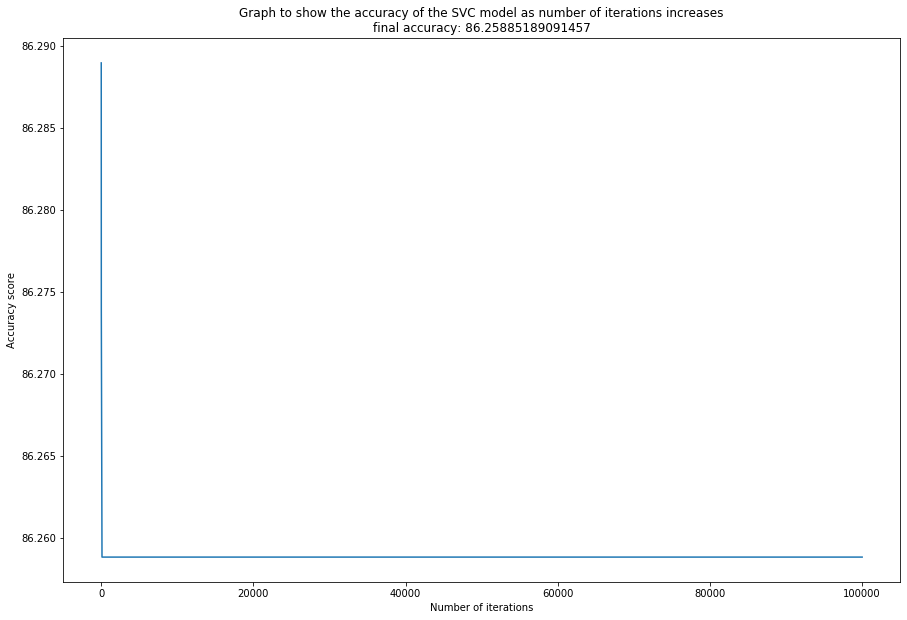

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, eng_tweet.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)

# Create a template lit to store accuracies
acc = []

# Iterate along a logarithmically spaced ranged
for i in np.logspace(0,5, num = 6):
    # Print out the number of iterations to use for the current loop
    print('Training model with iterations: ', i)
    # Create an SVC algorithm with the number of iterations for the current loop
    svc = LinearSVC(multi_class = 'ovr', max_iter = i, class_weight='balanced')
    # Fit the algorithm to the data
    svc.fit(X_train, y_train)
    # Append the current accuracy score to the template list
    acc.append(accuracy_score(y_test, svc.predict(X_test)) * 100)

# Convert the accuracy list to a series
acc = pd.Series(acc, index = np.logspace(0,5, num = 6))
# Set the plot size
plt.figure(figsize = (15,10))
# Set the plot title
title = 'Graph to show the accuracy of the SVC model as number of iterations increases\nfinal accuracy: ' + str(acc.iloc[-1])
plt.title(title)
# Set the xlabel and ylabel
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy score')
# Plot the graph
acc.plot.line()
plt.show()